In [13]:
import pandas as pd

df = pd.read_json("merged_videoId_vs_Alt_id.txt", orient="index")

Category = ['Education', 'People & Blogs', 'Entertainment', 'Howto & Style', 'Science & Technology', 'Sports']

df = df[df.Category.isin(Category)]

data = df.loc[:,['Number of Dimensions citations',
       'Video mentions', 'cited_by_fbwalls_count', 'cited_by_feeds_count',
       'cited_by_gplus_count', 'cited_by_msm_count','cited_by_rdts_count', 'cited_by_tweeters_count','cited_by_wikipedia_count', 'subno', 'dislikes', 'likes', 'views'] ]
target = df.loc[:, "Category"]

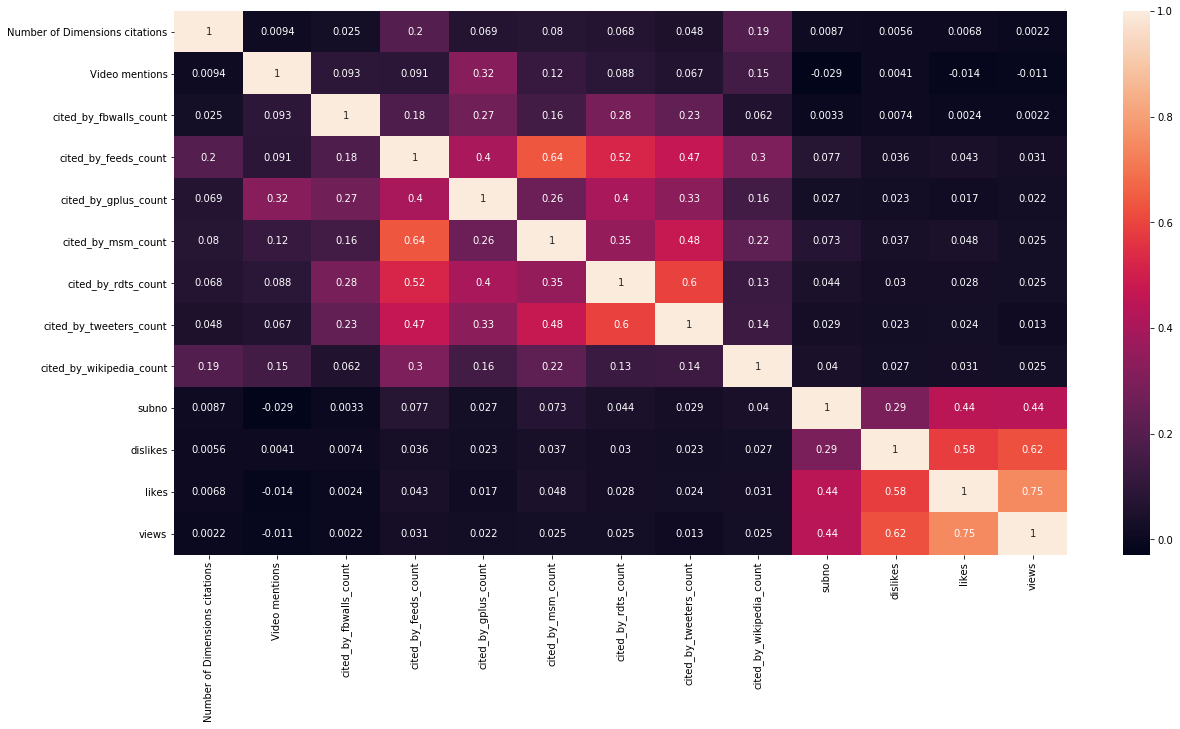

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10 ))
sns.heatmap(data.corr(), annot= True, ax=ax)

In [4]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
traindata,testdata,traintarget,testtarget = train_test_split(data, target, test_size=0.25)

#feature scaling
sc = StandardScaler()
traindata = sc.fit_transform(traindata)
testdata = sc.transform(testdata)


In [10]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [7]:
#Random Forest Classifier--
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random.fit(traindata,traintarget.values.ravel())
randomresult = random.predict(testdata)
print(classification_report(testtarget,randomresult))
sklearn.metrics.accuracy_score(testtarget, randomresult)

                      precision    recall  f1-score   support

           Education       0.57      0.61      0.59      4736
       Entertainment       0.61      0.29      0.39       924
       Howto & Style       0.64      0.33      0.44       723
      People & Blogs       0.59      0.63      0.61      4749
Science & Technology       0.75      0.79      0.77      7606
              Sports       0.48      0.31      0.37       684

         avg / total       0.64      0.65      0.64     19422



0.6473071774276593

In [8]:
#Decision Tree Classifier
decision = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes =10 , min_samples_leaf = 5, max_depth= 10)
decision.fit(traindata,traintarget)
decisionresult = decision.predict(testdata)
print(classification_report(testtarget,decisionresult))
sklearn.metrics.accuracy_score(testtarget, decisionresult)

                      precision    recall  f1-score   support

           Education       0.49      0.12      0.19      4736
       Entertainment       0.00      0.00      0.00       924
       Howto & Style       0.00      0.00      0.00       723
      People & Blogs       0.31      0.39      0.35      4749
Science & Technology       0.49      0.79      0.60      7606
              Sports       0.00      0.00      0.00       684

         avg / total       0.39      0.43      0.37     19422



C:\Users\srika\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.434816187828236

In [9]:
#logistic regression
lr = LogisticRegression(random_state = 0)
lr.fit(traindata, traintarget.values.ravel())
regres = lr.predict(testdata)
print(classification_report(testtarget,regres))
sklearn.metrics.accuracy_score(testtarget, regres)

                      precision    recall  f1-score   support

           Education       0.39      0.07      0.12      4736
       Entertainment       0.07      0.00      0.00       924
       Howto & Style       0.00      0.00      0.00       723
      People & Blogs       0.35      0.12      0.18      4749
Science & Technology       0.43      0.95      0.59      7606
              Sports       0.33      0.04      0.07       684

         avg / total       0.36      0.42      0.31     19422



C:\Users\srika\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4200391308825044